In [11]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import pypsa
import logging
import warnings
import matplotlib as plt
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.ERROR)

In [3]:
network = pypsa.Network(name='Texas')
network.import_from_netcdf('FinalTexasGrid.netcdf_copy')
removed_lines = pd.DataFrame()
reduced_generators = pd.DataFrame()
buses_disconnected = pd.DataFrame()

In [4]:
def remove_lines_random(network,n=1):
    global removed_lines
    lines_to_remove = network.lines.sample(n)
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network
def reduce_generators_random(network,n=1,reduction_factor=0):
    global reduced_generators
    generators_to_shutdown = network.generators.sample(n)
    network.mremove("Generator",generators_to_shutdown.index.to_series())
    generators_to_shutdown['p_nom'] = generators_to_shutdown['p_nom']*reduction_factor
    network.import_components_from_dataframe(generators_to_shutdown,"Generator")
    generators_to_shutdown['reduction_factor'] = reduction_factor
    reduced_generators = reduced_generators.append(generators_to_shutdown)
    return network
def disconnect_buses_random(network,n=1):
    global removed_lines
    global buses_disconnected
    buses_to_disconnect = network.buses.sample(n)
    buses_disconnected = buses_disconnected.append(buses_to_disconnect)
    buses_to_disconnect = buses_to_disconnect.index.to_series()
    lines = network.lines.copy()
    lines_to_remove = lines[(lines['bus0'].isin(buses_to_disconnect)) | (lines['bus1'].isin(buses_to_disconnect))]
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network
    

In [5]:
print(f"The network has {network.lines.shape[0]} lines.")
print(f"The network has {network.buses.shape[0]} buses.")
print(f"The network has {network.generators.shape[0]} generators.")

The network has 3205 lines.
The network has 1999 buses.
The network has 523 generators.


In [13]:
#network.lines.describe()
powa = np.array(network.buses_t.p.squeeze())
normalized = preprocessing.normalize(powa)
powa.describe()


ValueError: Expected 2D array, got 1D array instead:
array=[-20.78 -15.41   0.   ...   0.     0.   -90.76].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

(<matplotlib.collections.PatchCollection at 0x7fcdc786a070>,
 <matplotlib.collections.LineCollection at 0x7fcdc7f4b6a0>)

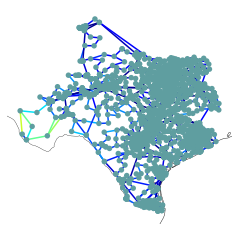

In [7]:
network.plot(line_colors = powa, line_cmap = plt.cm.jet)

In [6]:
print("Removing lines")
print(f"Initial number of lines: {network.lines.shape[0]}")
remove_lines_random(network)
print(f"Resulting number of lines: {network.lines.shape[0]}")
print("Removed Lines:")
display(removed_lines)

Removing lines
Initial number of lines: 3205
Resulting number of lines: 3204
Removed Lines:


,name,bus0,bus1,r,x,b,rateA,rateB,rateC,ratio,...,terrain_factor,num_parallel,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
101525,101525,3004048,3004155,0.00335,0.02332,0.00381,221.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Disconnecting buses")
print(f"Initial number of lines: {network.lines.shape[0]}")
disconnect_buses_random(network)
print(f"Resulting number of lines: {network.lines.shape[0]}")
print("Removed Lines:")
display(removed_lines)
print("Buses Disconnected:")
display(buses_disconnected)

Disconnecting buses
Initial number of lines: 3204
Resulting number of lines: 3198
Removed Lines:


,name,bus0,bus1,r,x,b,rateA,rateB,rateC,ratio,...,terrain_factor,num_parallel,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
101525,101525,3004048,3004155,0.00335,0.02332,0.00381,221.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102629,102629,3006039,3006038,0.00027,0.01330,0.00000,1269.0,0.0,0.0,1.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102630,102630,3006041,3006038,0.00040,0.02009,0.00000,296.0,0.0,0.0,1.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102631,102631,3006042,3006038,0.00042,0.03102,0.00000,479.0,0.0,0.0,1.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102632,102632,3006038,3006066,0.00105,0.01278,0.84902,2020.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102633,102633,3006254,3006038,0.00024,0.00295,0.19592,2020.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102634,102634,3006349,3006038,0.00017,0.00200,0.13292,2020.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Buses Disconnected:


,y,x,v_nom,v_mag_pu_max,v_mag_pu_min,type,carrier,unit,v_mag_pu_set,control,sub_network
name,,,,,,,,,,,
3006038,30.2934,-97.7844,500.0,1.1,0.9,,AC,None,1.0,PQ,


In [8]:
print('Reducing Generators Capacity:')
reduce_generators_random(network)
print("Generators Reduced:")
display(reduced_generators)

Reducing Generators Capacity:
Generators Reduced:


,bus,p_nom,Qmax,Qmin,Vg,mBase,p_nom_max,p_nom_min,Pc1,Pc2,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,reduction_factor
name,,,,,,,,,,,,,,,,,,,,,
13156,3006078,0.0,262.51,-68.73,1.0,676.0,563.33,169.0,0,0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,0
